In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#Reading the data
df=pd.read_csv('/content/sample_data/movies.csv')

In [3]:
#Initial glimpse of data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
#Lets loop through the data to find missing values in columns
for col in df.columns:
  pc_missing=np.mean(df[col].isnull())
  print('{}--{}%'.format(col,pc_missing))  

name--0.0%
rating--0.010041731872717789%
genre--0.0%
year--0.0%
released--0.0002608242044861763%
score--0.0003912363067292645%
votes--0.0003912363067292645%
director--0.0%
writer--0.0003912363067292645%
star--0.00013041210224308815%
country--0.0003912363067292645%
budget--0.2831246739697444%
gross--0.02464788732394366%
company--0.002217005738132499%
runtime--0.0005216484089723526%


In [8]:
#lets analyze the datatypes of our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [29]:

df=df.dropna()
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearofRel,YearofReltemp
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"[June 13, 1980 (United States)]","[June 13, 1980 (United States)]"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"[July 2, 1980 (United States)]","[July 2, 1980 (United States)]"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"[June 20, 1980 (United States)]","[June 20, 1980 (United States)]"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"[July 2, 1980 (United States)]","[July 2, 1980 (United States)]"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"[July 25, 1980 (United States)]","[July 25, 1980 (United States)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,"[January 17, 2020 (United States)]","[January 17, 2020 (United States)]"
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,"[February 14, 2020 (United States)]","[February 14, 2020 (United States)]"
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,"[January 17, 2020 (United States)]","[January 17, 2020 (United States)]"
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,"[February 21, 2020 (United States)]","[February 21, 2020 (United States)]"


In [31]:
#Checking out the highest grossing film
df.sort_values(by='gross',inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearofRel,YearofReltemp
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,"[December 18, 2009 (United States)]","[December 18, 2009 (United States)]"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,"[April 26, 2019 (United States)]","[April 26, 2019 (United States)]"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,"[December 19, 1997 (United States)]","[December 19, 1997 (United States)]"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"[December 18, 2015 (United States)]","[December 18, 2015 (United States)]"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,"[April 27, 2018 (United States)]","[April 27, 2018 (United States)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,"[January 15, 2015 (Sweden)]","[January 15, 2015 (Sweden)]"
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0,"[June 4, 1994 (South Korea)]","[June 4, 1994 (South Korea)]"
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,"[May 11, 2001 (Canada)]","[May 11, 2001 (Canada)]"
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,"[March 12, 1982 (United States)]","[March 12, 1982 (United States)]"


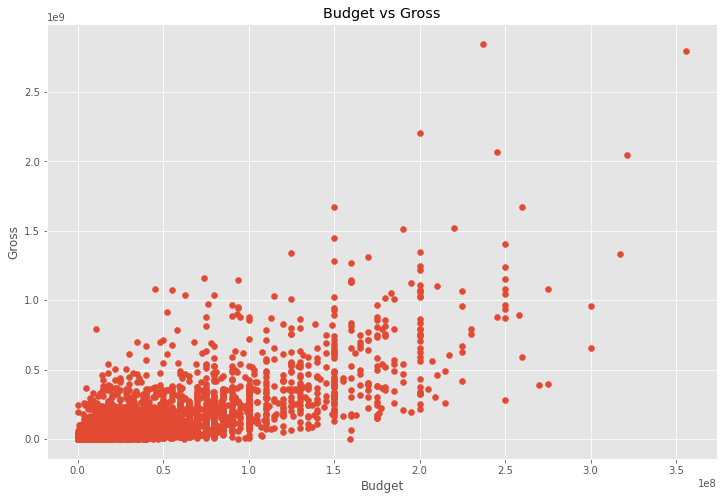

In [34]:

#scatter plot for budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

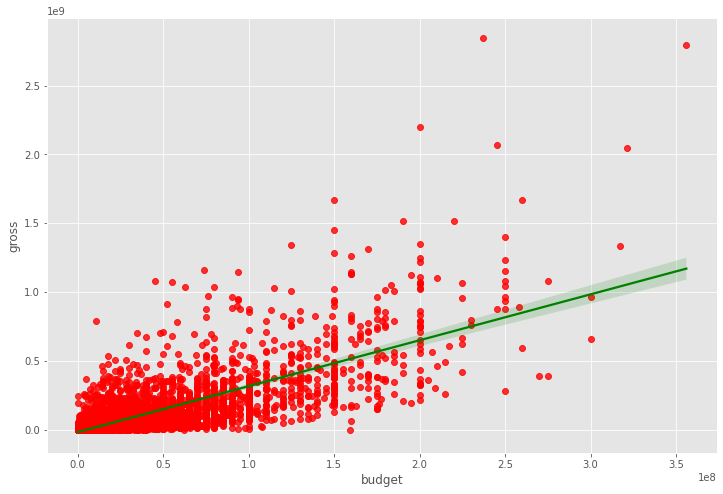

In [39]:
#Plot Budget vs Gross
sns.regplot(x="budget", y="gross", data=df,scatter_kws={"color":'red'},line_kws={"color":'green'})

In [40]:
# find the co-relation
df.corr()#we can try pearson,kendall,spearman
# There is a high corelation between budget and gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


# New section

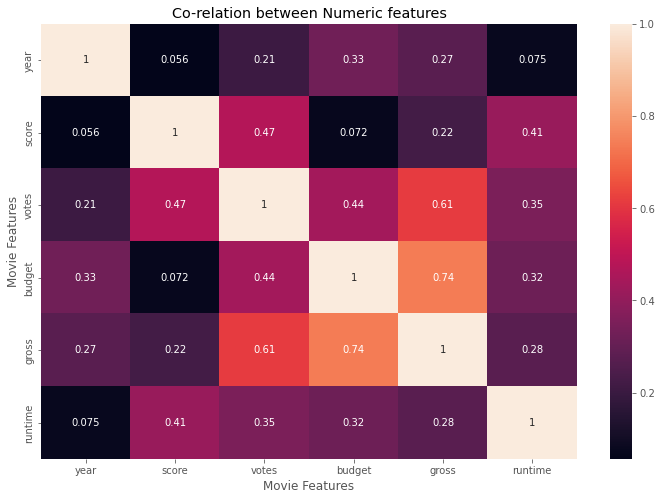

In [43]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title('Co-relation between Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [48]:
#Top ten highest grossing films
df.groupby('name')['gross'].sum().sort_values(ascending=False)[:10]

name
Avatar                                        2.847246e+09
Avengers: Endgame                             2.797501e+09
The Lion King                                 2.754448e+09
Titanic                                       2.201647e+09
Star Wars: Episode VII - The Force Awakens    2.069522e+09
Avengers: Infinity War                        2.048360e+09
Beauty and the Beast                          1.689402e+09
Jurassic World                                1.670516e+09
Aladdin                                       1.554744e+09
The Avengers                                  1.542200e+09
Name: gross, dtype: float64

In [ ]:
#Top ten highest grossing films
df.groupby('name')['gross'].sum().sort_values(ascending=False)[:10]

In [60]:
#Top ten highest grossing movies in 2019
df.where(df['year']==2019).groupby('name')['gross'].sum().sort_values(ascending=False)[:10]

name
Avengers: Endgame                                2.797501e+09
The Lion King                                    1.670728e+09
Frozen II                                        1.450027e+09
Spider-Man: Far from Home                        1.131928e+09
Captain Marvel                                   1.128463e+09
Star Wars: Episode IX - The Rise of Skywalker    1.078233e+09
Joker                                            1.074427e+09
Toy Story 4                                      1.073395e+09
Aladdin                                          1.050694e+09
Jumanji: The Next Level                          8.000597e+08
Name: gross, dtype: float64

In [61]:
#Top ten highest grossing companies
df.groupby('company')['gross'].sum().sort_values(ascending=False)[:10]

company
Warner Bros.             5.461096e+10
Universal Pictures       5.124111e+10
Columbia Pictures        4.235643e+10
Paramount Pictures       4.002170e+10
Twentieth Century Fox    3.954257e+10
Walt Disney Pictures     3.583365e+10
New Line Cinema          1.961285e+10
Marvel Studios           1.506559e+10
DreamWorks Animation     1.187361e+10
Dreamworks Pictures      1.159381e+10
Name: gross, dtype: float64

In [49]:
#Top ten highest budget films
df.sort_values(by='budget',ascending=False)[:10]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearofRel,YearofReltemp
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,"[April 26, 2019 (United States)]","[April 26, 2019 (United States)]"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,"[April 27, 2018 (United States)]","[April 27, 2018 (United States)]"
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0,"[December 15, 2017 (United States)]","[December 15, 2017 (United States)]"
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0,"[November 17, 2017 (United States)]","[November 17, 2017 (United States)]"
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0,"[May 25, 2007 (United States)]","[May 25, 2007 (United States)]"
7463,Star Wars: Episode IX - The Rise of Skywalker,PG-13,Action,2019,"December 20, 2019 (United States)",6.5,394000.0,J.J. Abrams,Chris Terrio,Daisy Ridley,United States,275000000.0,1.078233e+09,Walt Disney Pictures,141.0,"[December 20, 2019 (United States)]","[December 20, 2019 (United States)]"
7261,Solo: A Star Wars Story,PG-13,Action,2018,"May 25, 2018 (United States)",6.9,306000.0,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,United States,275000000.0,3.929248e+08,Lucasfilm,135.0,"[May 25, 2018 (United States)]","[May 25, 2018 (United States)]"
4870,Superman Returns,PG-13,Action,2006,"June 28, 2006 (United States)",6.0,274000.0,Bryan Singer,Michael Dougherty,Brandon Routh,United States,270000000.0,3.910812e+08,Warner Bros.,154.0,"[June 28, 2006 (United States)]","[June 28, 2006 (United States)]"
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0,"[July 19, 2019 (United States)]","[July 19, 2019 (United States)]"
5658,Tangled,PG,Animation,2010,"November 24, 2010 (United States)",7.7,417000.0,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260000000.0,5.924628e+08,Walt Disney Animation Studios,100.0,"[November 24, 2010 (United States)]","[November 24, 2010 (United States)]"
